## Estadística Aplicada

Sesión 13 - 28 septiembre

Alexandra Guadalupe Valdez Mireles 

1910361

Gpo 44

In [1]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Librería Especializada
import yfinance as yf 
## Definimos el tamaño de la gráfica
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
## Importar los datos de la acción de Walmex
walmex = yf.download('WALMEX.MX',
                     start='2016-01-01',
                     end='2022-12-31',
                     progress=False)

In [5]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479023,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329960,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098064,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118736,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980030,15949791


In [6]:
walmex = walmex[['Adj Close']]

In [7]:
walmex.head()

,Adj Close
Date,
2016-01-04,35.479023
2016-01-05,35.329960
2016-01-06,35.098064
2016-01-07,33.118736
2016-01-08,33.980030


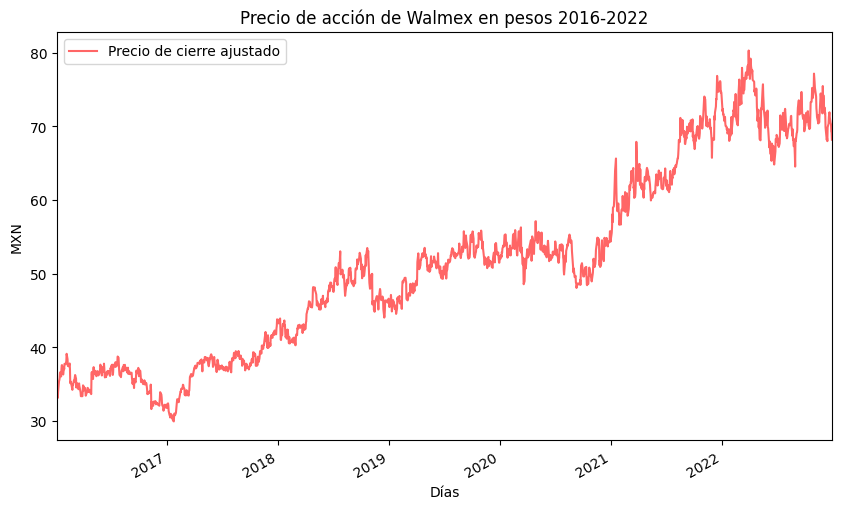

In [16]:
walmex = walmex.rename(columns={'Adj Close':'Precio de cierre ajustado'})
## alpha da transparencia: alpha=1 NO TRANSPARENTE, alpha=0 TRANSPARENTE
walmex.plot(color='red',alpha=0.6)
plt.title('Precio de acción de Walmex en pesos 2016-2022')
plt.xlim('2016-01-04','2022-12-30')
plt.xlabel('Días')
plt.ylabel('MXN');

In [11]:
walmex.head(1)

,Precio de cierre ajustado
Date,
2016-01-04,35.479023


In [12]:
walmex.tail(1)

,Precio de cierre ajustado
Date,
2022-12-30,68.158188


In [18]:
## Cálculo de las señales de corto y largo plazo (PROMEDIO MÓVIL SIMPLE)
## SEÑAL CORTO PLAZO
walmex['PMS-10']=walmex['Precio de cierre ajustado'].rolling(10).mean()
## SEÑAL LARGO PLAZO
walmex['PMS-50']=walmex['Precio de cierre ajustado'].rolling(50).mean()

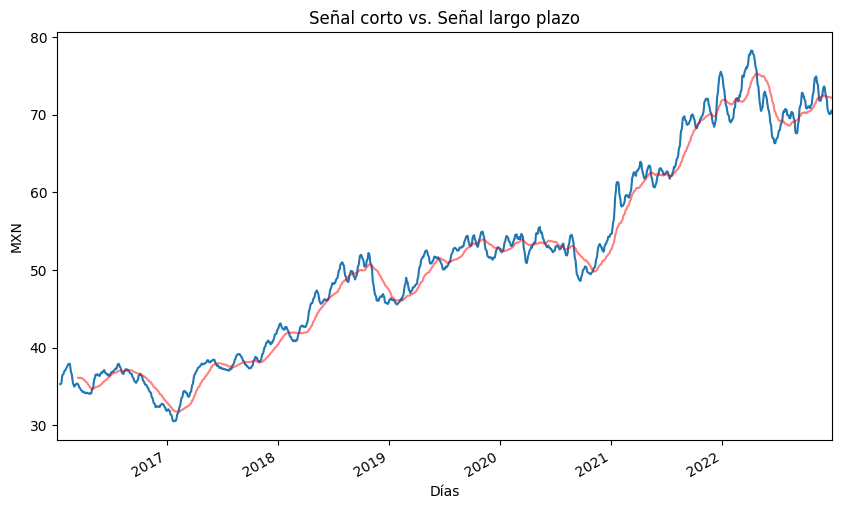

In [24]:
walmex['PMS-10'].plot()
walmex['PMS-50'].plot(color='red',alpha=0.5)
plt.title('Señal corto vs. Señal largo plazo')
plt.xlim('2016-01-04','2022-12-30')
plt.xlabel('Días')
plt.ylabel('MXN');

In [25]:
walmex['decisión'] = walmex['PMS-10'] > walmex['PMS-50']


In [27]:
walmex.head()

,Precio de cierre ajustado,PMS-10,PMS-50,decisión
Date,,,,
2016-01-04,35.479023,NaN,NaN,False
2016-01-05,35.329960,NaN,NaN,False
2016-01-06,35.098064,NaN,NaN,False
2016-01-07,33.118736,NaN,NaN,False
2016-01-08,33.980030,NaN,NaN,False


In [28]:
walmex.tail()

,Precio de cierre ajustado,PMS-10,PMS-50,decisión
Date,,,,
2022-12-26,70.354919,70.106554,72.220190,False
2022-12-27,70.285660,70.320291,72.202119,False
2022-12-28,69.266449,70.407368,72.184242,False
2022-12-29,69.137817,70.524132,72.174767,False
2022-12-30,68.158188,70.353934,72.136684,False


In [29]:
walmex['decisión1']=np.where(walmex['decisión']==True, 'comprar/mantener', 'vender/no comprar')

In [30]:
walmex.head()

,Precio de cierre ajustado,PMS-10,PMS-50,decisión,decisión1
Date,,,,,
2016-01-04,35.479023,NaN,NaN,False,vender/no comprar
2016-01-05,35.329960,NaN,NaN,False,vender/no comprar
2016-01-06,35.098064,NaN,NaN,False,vender/no comprar
2016-01-07,33.118736,NaN,NaN,False,vender/no comprar
2016-01-08,33.980030,NaN,NaN,False,vender/no comprar


USAREMOS PCT_CHANGE()
pct_change $\frac{P_t-P_{t-1}}{P_{t-1}}$

In [32]:
## pct_change() -> (Pt - Pt-1)/Pt-1
walmex['retorno'] = walmex['Precio de cierre ajustado'].pct_change()

In [33]:
walmex[['Precio de cierre ajustado', 'retorno']]

,Precio de cierre ajustado,retorno
Date,,
2016-01-04,35.479023,NaN
2016-01-05,35.329960,-0.004201
2016-01-06,35.098064,-0.006564
2016-01-07,33.118736,-0.056394
2016-01-08,33.980030,0.026006
...,...,...
2022-12-26,70.354919,-0.012226
2022-12-27,70.285660,-0.000984
2022-12-28,69.266449,-0.014501
